In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-suicide-rates-1990-to-2022/age_std_suicide_rates_1990-2022.csv
/kaggle/input/global-suicide-rates-1990-to-2022/suicide_rates_1990-2022.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data = pd.read_csv(r"/kaggle/input/global-suicide-rates-1990-to-2022/age_std_suicide_rates_1990-2022.csv")

In [4]:
data

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,AF,Africa,MYT,Mayotte,2015,Female,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5924,AF,Africa,REU,R?union,2016,Male,68,2.636681,15.399045,16.144005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5925,AF,Africa,REU,R?union,2016,Female,17,0.796253,3.521507,3.790134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5926,AF,Africa,REU,R?union,2015,Male,79,3.212688,18.702514,18.895318,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
5923,AF,Africa,MYT,Mayotte,2015,Female,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5924,AF,Africa,REU,R?union,2016,Male,68,2.636681,15.399045,16.144005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5925,AF,Africa,REU,R?union,2016,Female,17,0.796253,3.521507,3.790134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5926,AF,Africa,REU,R?union,2015,Male,79,3.212688,18.702514,18.895318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5927,AF,Africa,REU,R?union,2015,Female,20,0.965251,3.887067,4.491697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

In [7]:
data.isnull().sum()

RegionCode                        0
RegionName                        0
CountryCode                       0
CountryName                       0
Year                              0
Sex                               0
SuicideCount                      0
CauseSpecificDeathPercentage      1
StdDeathRate                    208
DeathRatePer100K                208
Population                      296
GDP                             362
GDPPerCapita                    362
GNI                             498
GNIPerCapita                    538
InflationRate                   723
EmploymentPopulationRatio       556
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
5366,AF,Africa,ZAF,South Africa,2016,Female,78,0.035226,0.278158,0.273954,56422274.0,3.240000e+11,5735.066787,3.360000e+11,13350.0,6.571396,44.046
5368,AF,Africa,ZAF,South Africa,2017,Male,281,0.115853,1.020338,0.999238,56641209.0,3.810000e+11,6734.475153,3.370000e+11,13560.0,5.184247,44.679
5369,AF,Africa,ZAF,South Africa,2017,Female,95,0.043992,0.326797,0.328853,56641209.0,3.810000e+11,6734.475153,3.370000e+11,13560.0,5.184247,44.679
5370,AF,Africa,ZAF,South Africa,2018,Male,232,0.097257,0.813995,0.814175,57339635.0,4.050000e+11,7067.724165,3.670000e+11,13930.0,4.517165,44.051
5371,AF,Africa,ZAF,South Africa,2018,Female,82,0.038353,0.284316,0.279888,57339635.0,4.050000e+11,7067.724165,3.670000e+11,13930.0,4.517165,44.051


In [12]:
data["RegionName"].value_counts()

RegionName
Europe                             2020
Asia                               1076
Central and South America           866
North America and the Caribbean     448
Africa                              152
Oceania                             136
Name: count, dtype: int64

<Axes: xlabel='RegionName', ylabel='SuicideCount'>

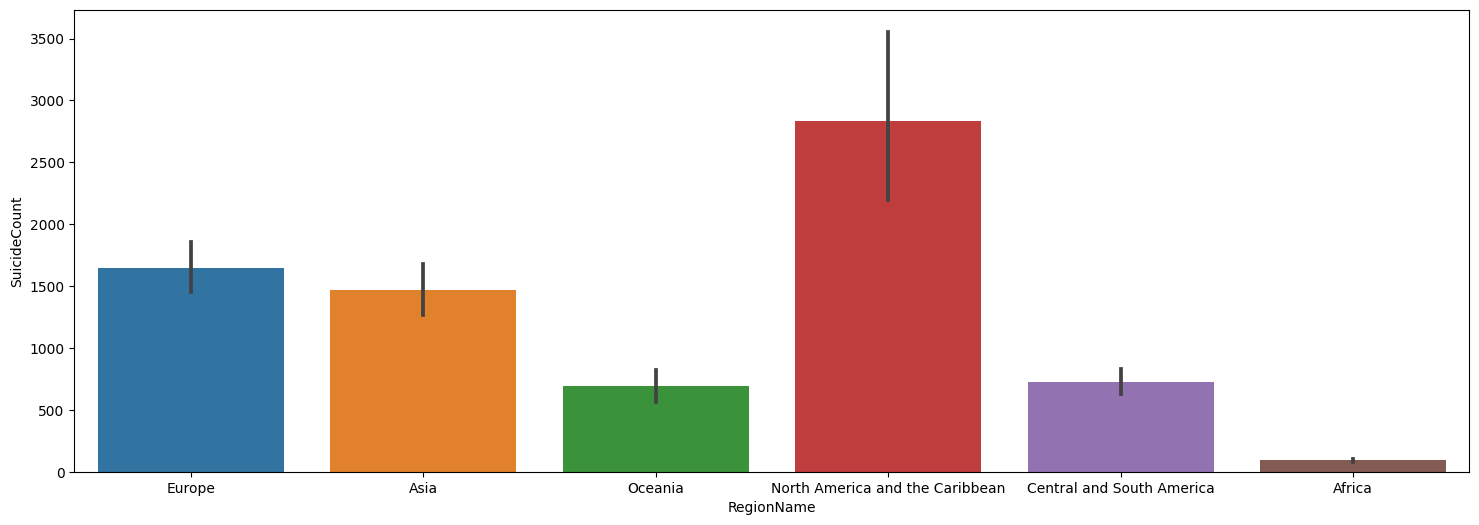

In [14]:
plt.figure(figsize = (18,6))
sn.barplot(x = "RegionName" , y = "SuicideCount" , data = data)

In [15]:
data_asia = data[data["RegionName"] == "Asia"]

In [16]:
data_asia

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
38,AS,Asia,ARM,Armenia,1994,Male,76,0.558618,4.863430,4.189174,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
39,AS,Asia,ARM,Armenia,1994,Female,36,0.325880,1.844696,1.862679,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
40,AS,Asia,ARM,Armenia,1995,Male,95,0.714447,5.693866,5.219207,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
41,AS,Asia,ARM,Armenia,1995,Female,35,0.303162,1.760966,1.804310,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
42,AS,Asia,ARM,Armenia,1996,Male,63,0.477273,4.075470,3.447144,3298898.0,1.596969e+09,484.091641,1.641720e+09,1960.0,18.681186,57.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,AS,Asia,UZB,Uzbekistan,2017,Female,801,1.097155,4.813930,4.966167,32388600.0,6.208132e+10,1916.764625,7.998291e+10,6970.0,13.875743,53.499
5209,AS,Asia,UZB,Uzbekistan,2018,Male,1467,1.734207,9.086770,8.861782,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5210,AS,Asia,UZB,Uzbekistan,2018,Female,811,1.153283,4.849886,4.944559,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5211,AS,Asia,UZB,Uzbekistan,2019,Male,1446,1.716035,8.862059,8.567400,33580350.0,6.028350e+10,1795.201768,6.325433e+10,7810.0,14.525736,53.768


<Axes: xlabel='Sex', ylabel='SuicideCount'>

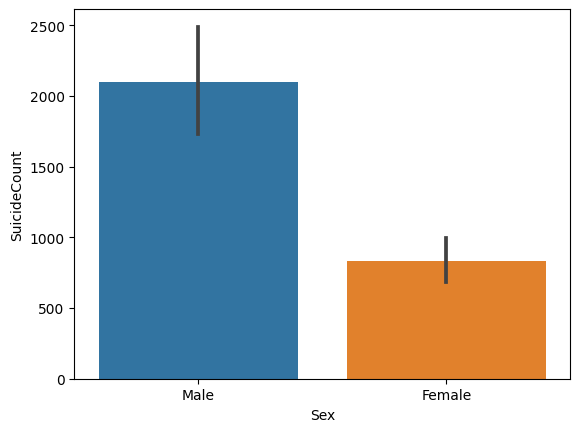

In [17]:
sn.barplot(x = "Sex"  , y = "SuicideCount" , data = data_asia)

In [19]:
data_asia = data_asia.drop(["RegionCode"] , axis = 1)

In [20]:
data_asia

,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
38,Asia,ARM,Armenia,1994,Male,76,0.558618,4.863430,4.189174,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
39,Asia,ARM,Armenia,1994,Female,36,0.325880,1.844696,1.862679,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
40,Asia,ARM,Armenia,1995,Male,95,0.714447,5.693866,5.219207,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
41,Asia,ARM,Armenia,1995,Female,35,0.303162,1.760966,1.804310,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
42,Asia,ARM,Armenia,1996,Male,63,0.477273,4.075470,3.447144,3298898.0,1.596969e+09,484.091641,1.641720e+09,1960.0,18.681186,57.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,Asia,UZB,Uzbekistan,2017,Female,801,1.097155,4.813930,4.966167,32388600.0,6.208132e+10,1916.764625,7.998291e+10,6970.0,13.875743,53.499
5209,Asia,UZB,Uzbekistan,2018,Male,1467,1.734207,9.086770,8.861782,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5210,Asia,UZB,Uzbekistan,2018,Female,811,1.153283,4.849886,4.944559,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5211,Asia,UZB,Uzbekistan,2019,Male,1446,1.716035,8.862059,8.567400,33580350.0,6.028350e+10,1795.201768,6.325433e+10,7810.0,14.525736,53.768


In [21]:
data_asia.isnull().sum()

RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
SuicideCount                    0
CauseSpecificDeathPercentage    0
StdDeathRate                    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GNI                             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

In [25]:
data_ind = data_asia.drop(["RegionName","CountryCode"] , axis = 1)

In [32]:
data_ind = data_ind.rename(index = {"Hk":"Hong Kong"})

In [33]:
data_ind

,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
38,Armenia,1994,Male,76,0.558618,4.863430,4.189174,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
39,Armenia,1994,Female,36,0.325880,1.844696,1.862679,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
40,Armenia,1995,Male,95,0.714447,5.693866,5.219207,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
41,Armenia,1995,Female,35,0.303162,1.760966,1.804310,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
42,Armenia,1996,Male,63,0.477273,4.075470,3.447144,3298898.0,1.596969e+09,484.091641,1.641720e+09,1960.0,18.681186,57.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,Uzbekistan,2017,Female,801,1.097155,4.813930,4.966167,32388600.0,6.208132e+10,1916.764625,7.998291e+10,6970.0,13.875743,53.499
5209,Uzbekistan,2018,Male,1467,1.734207,9.086770,8.861782,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5210,Uzbekistan,2018,Female,811,1.153283,4.849886,4.944559,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5211,Uzbekistan,2019,Male,1446,1.716035,8.862059,8.567400,33580350.0,6.028350e+10,1795.201768,6.325433e+10,7810.0,14.525736,53.768


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='SuicideCount'>

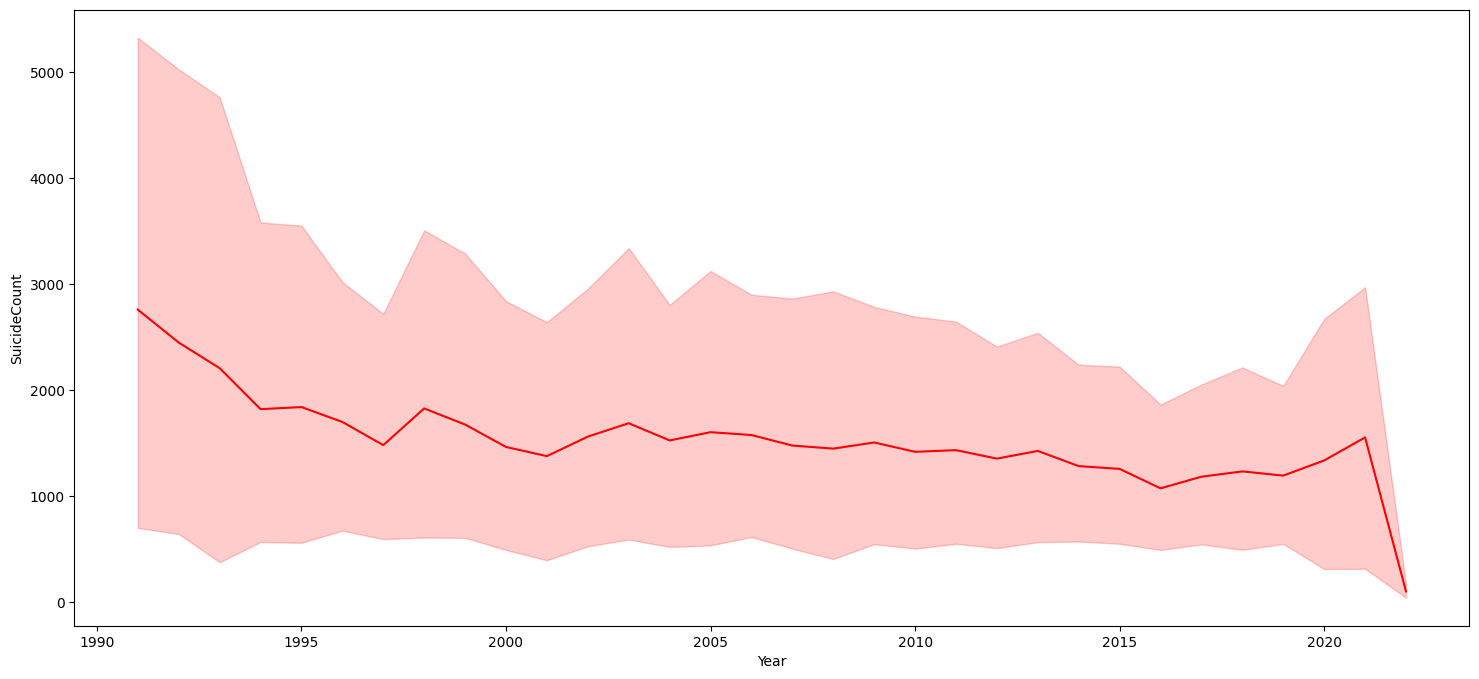

In [42]:
plt.figure(figsize = (18,8))
sn.lineplot(x = "Year" , y = "SuicideCount" , data = data_ind , color = "red")

<Axes: xlabel='CountryName', ylabel='SuicideCount'>

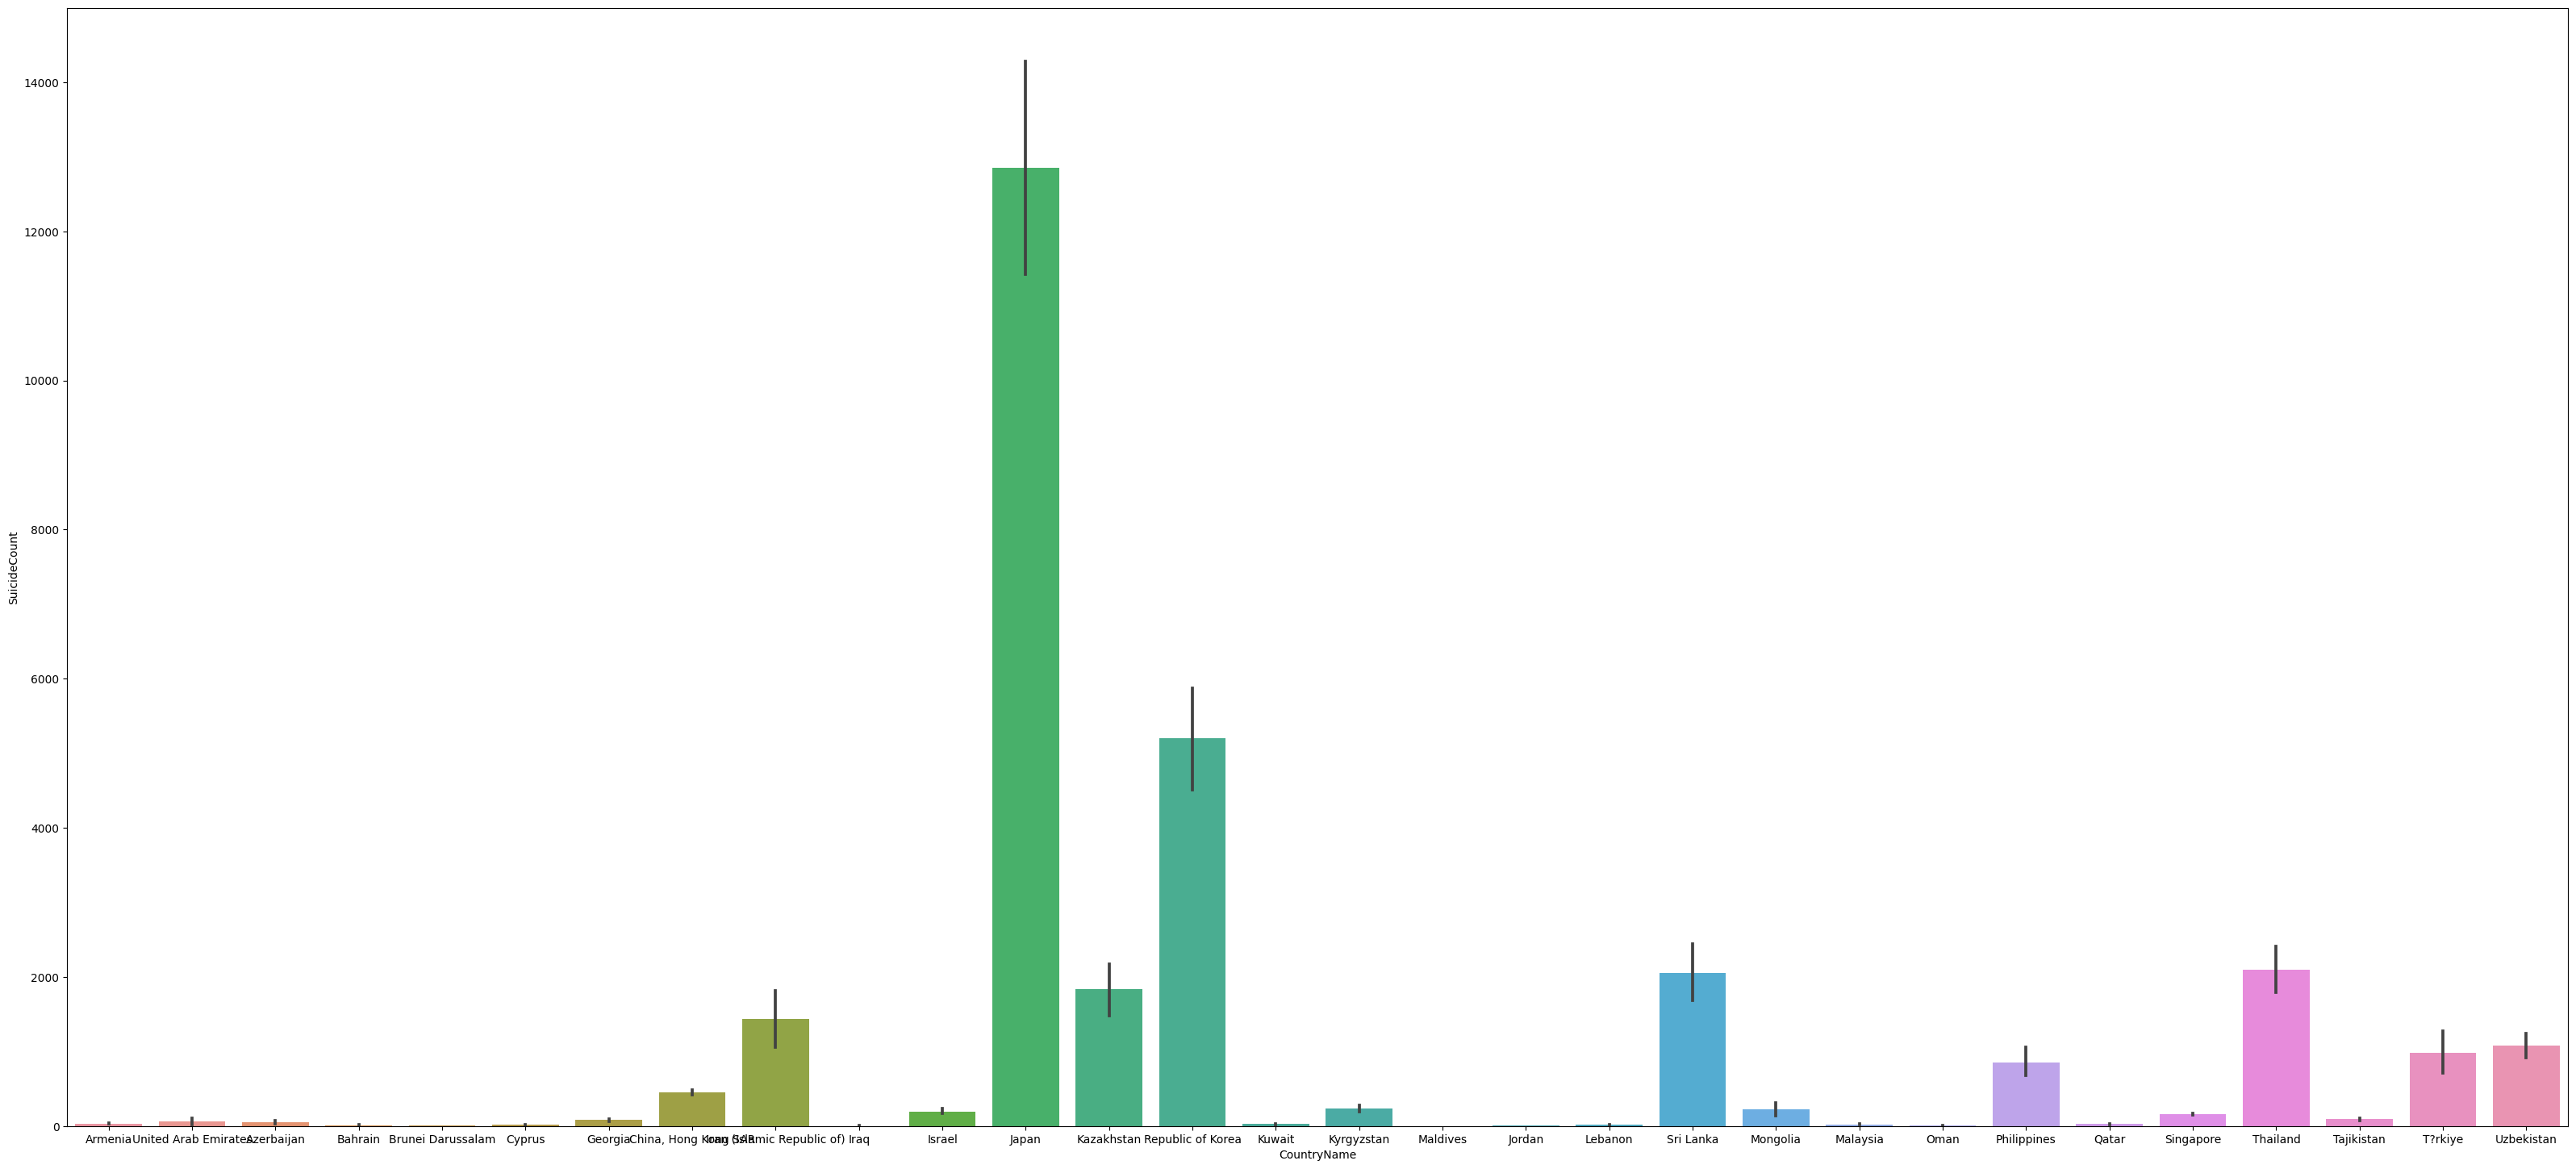

In [38]:
plt.figure(figsize = (40,18))
sn.barplot(x = "CountryName" , y = "SuicideCount" , data = data_ind)

In [31]:
data_ind["CountryName"].value_counts()

CountryName
Singapore                     64
Republic of Korea             62
Japan                         62
Kazakhstan                    56
Armenia                       54
Thailand                      54
China, Hong Kong SAR          54
Kuwait                        52
Israel                        50
Georgia                       50
Kyrgyzstan                    48
Brunei Darussalam             48
Malaysia                      42
Cyprus                        40
Sri Lanka                     40
Philippines                   40
Bahrain                       36
Maldives                      36
Qatar                         34
Azerbaijan                    26
T?rkiye                       22
Uzbekistan                    18
Jordan                        18
Oman                          18
Tajikistan                    12
Mongolia                      12
Iran (Islamic Republic of)    10
Lebanon                        6
United Arab Emirates           6
Iraq                           

In [45]:
data_ind.columns

Index(['CountryName', 'Year', 'Sex', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'StdDeathRate', 'DeathRatePer100K',
       'Population', 'GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio'],
      dtype='object')

In [47]:
from scipy import stats

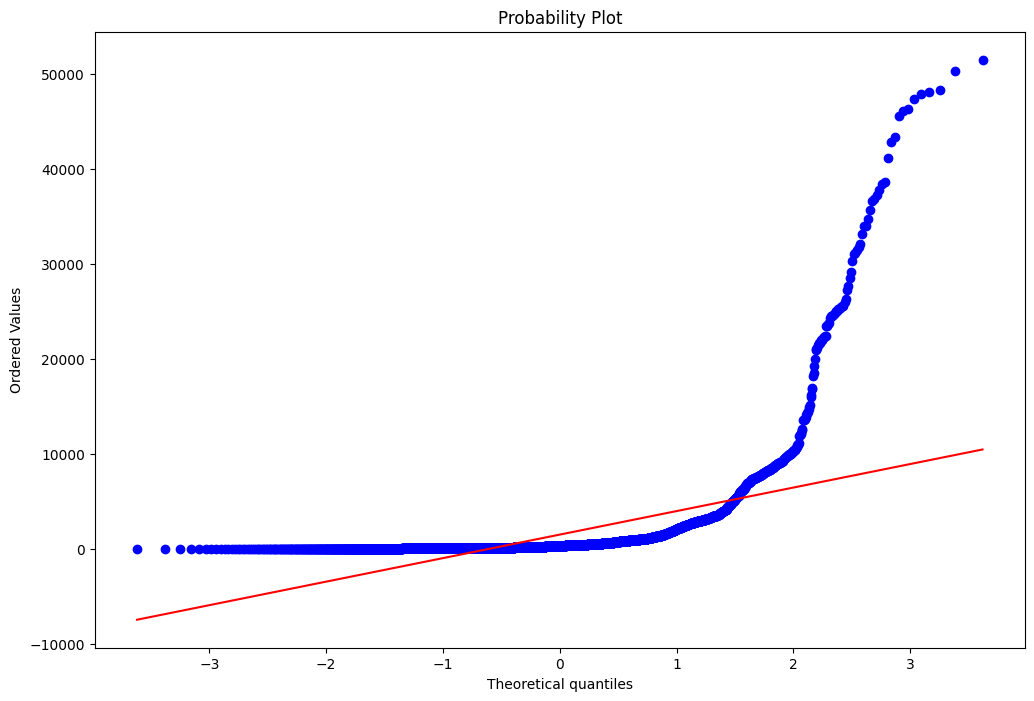

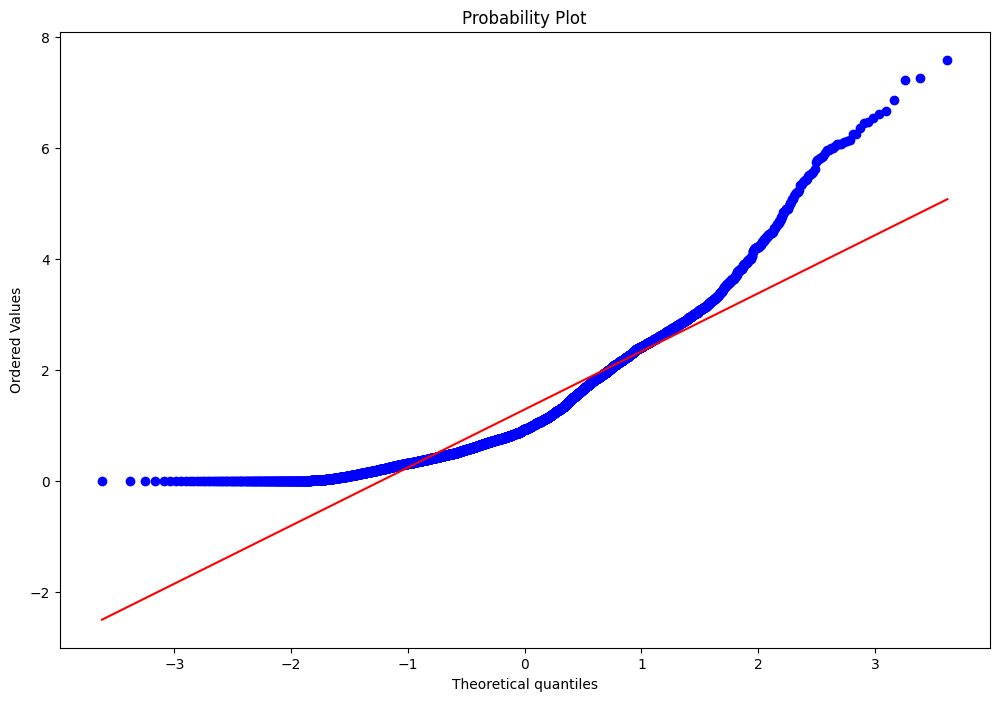

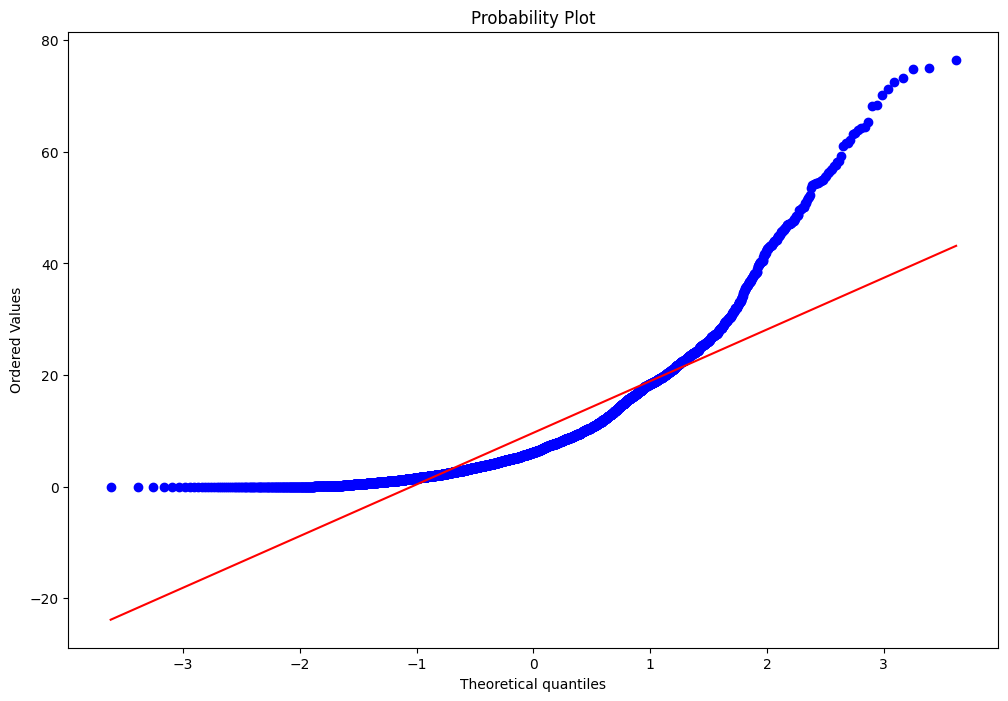

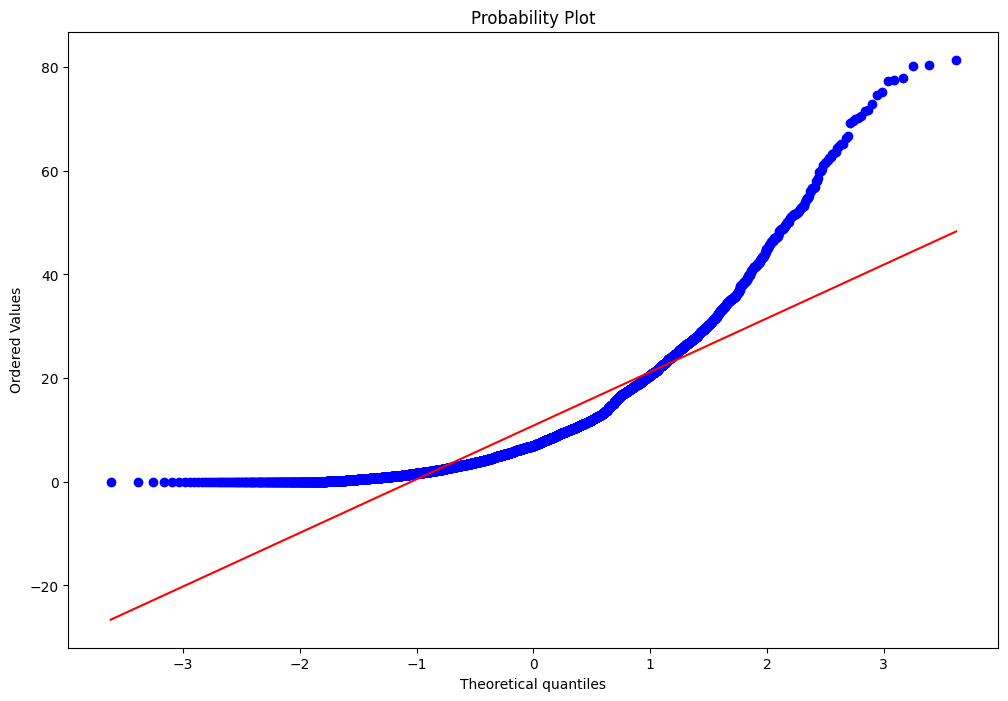

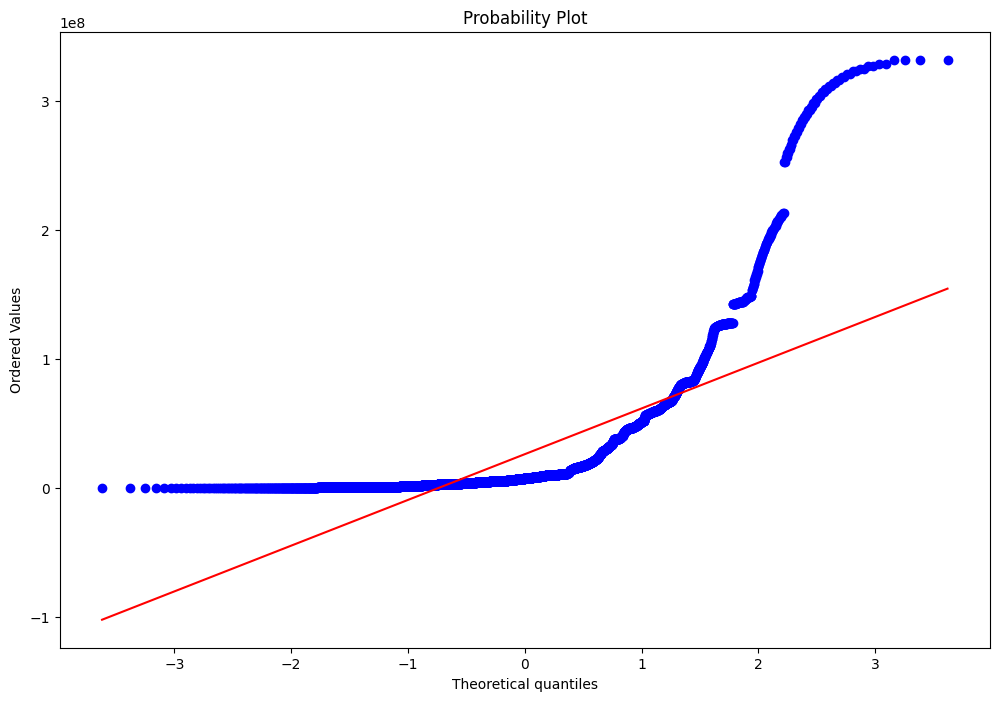

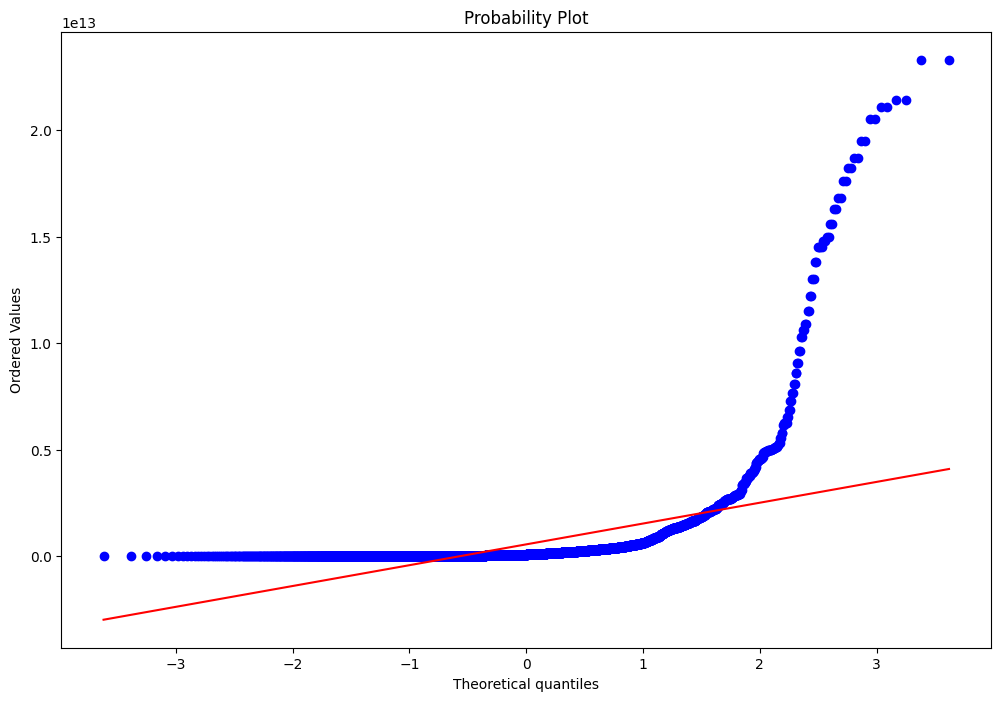

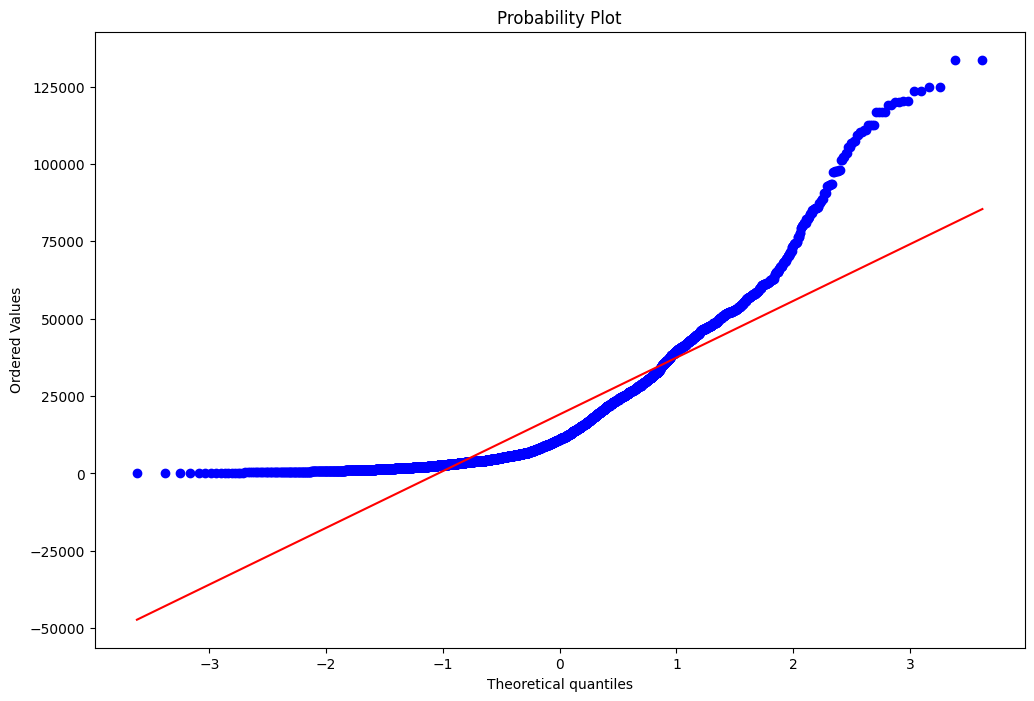

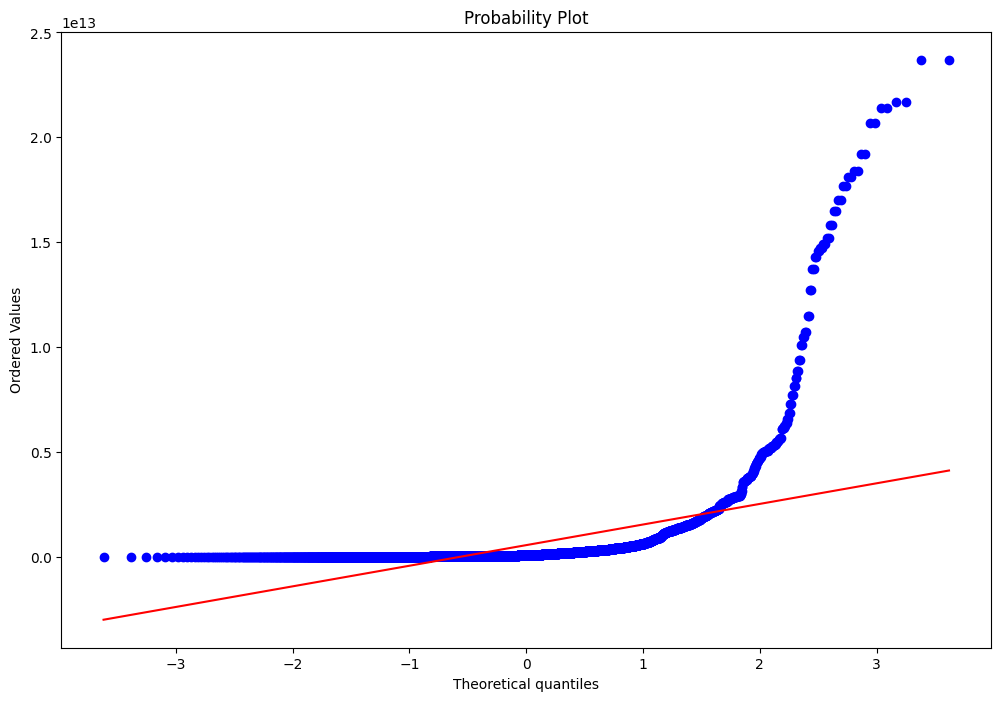

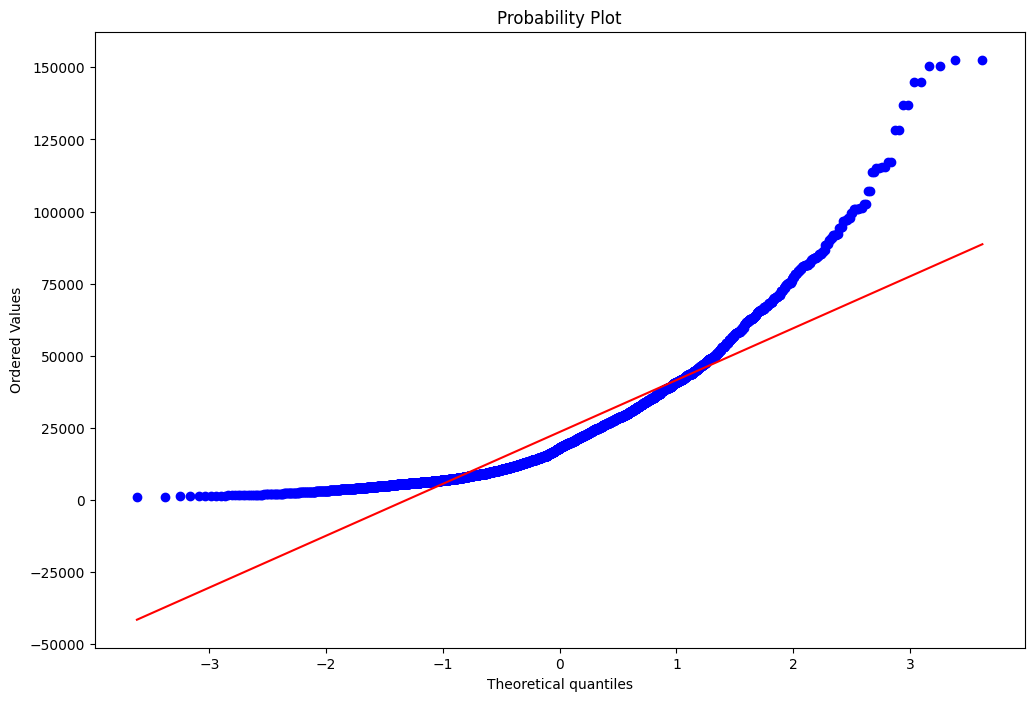

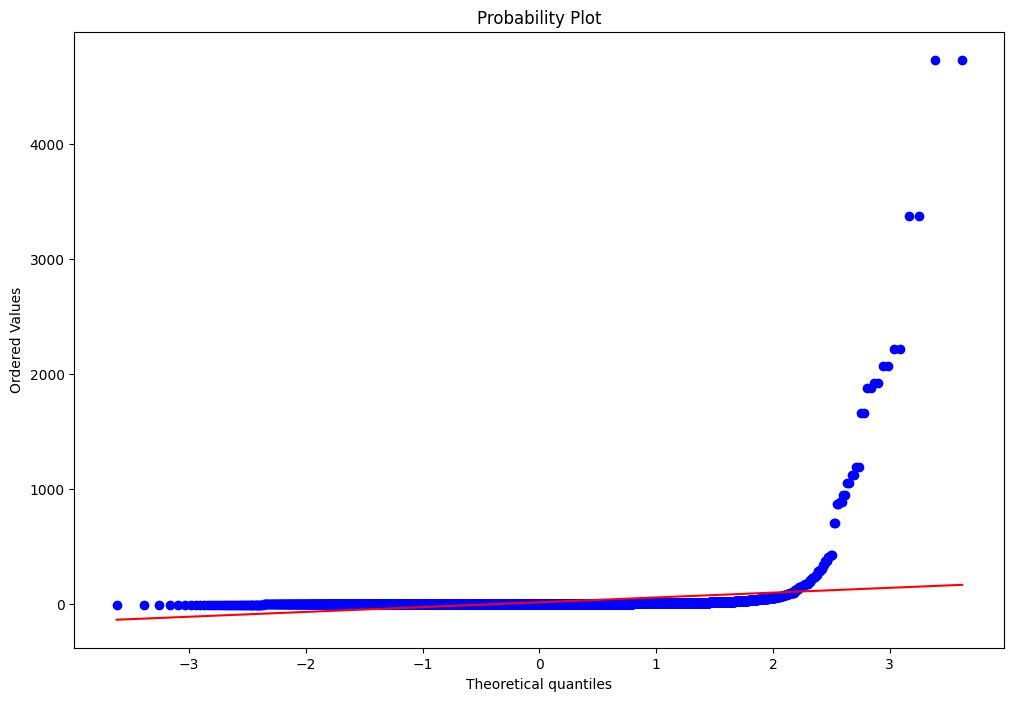

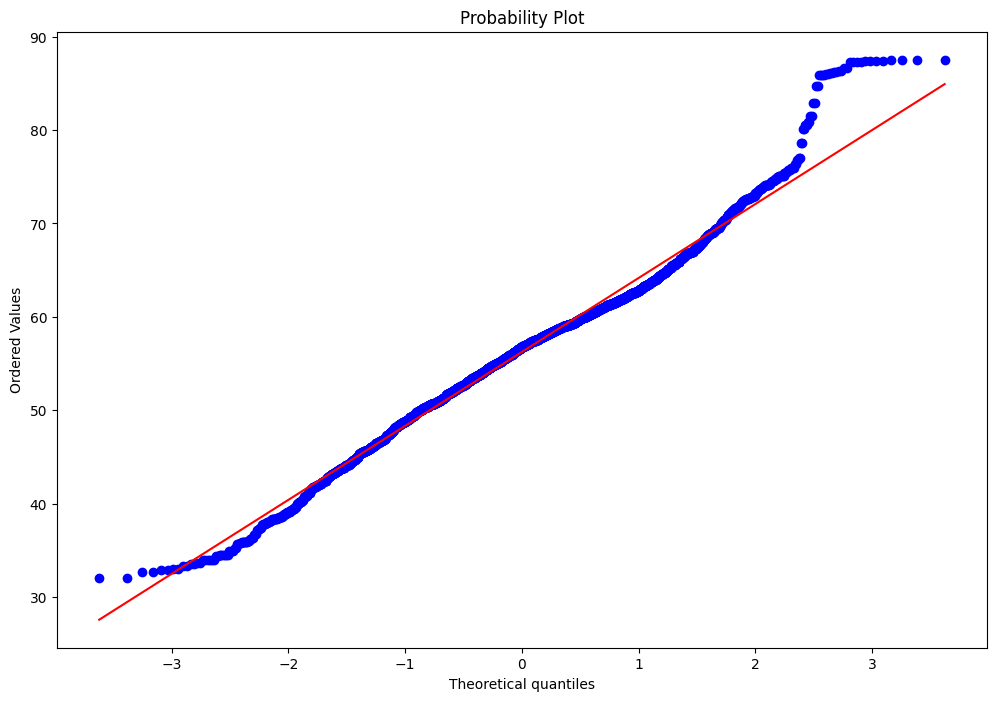

In [50]:
for i in ['SuicideCount','CauseSpecificDeathPercentage', 'StdDeathRate', 'DeathRatePer100K','Population', 'GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio']:
    plt.figure(figsize = (12,8))
    stats.probplot(data[i] , plot = plt)
     

/tmp/ipykernel_33/2308654908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2308654908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

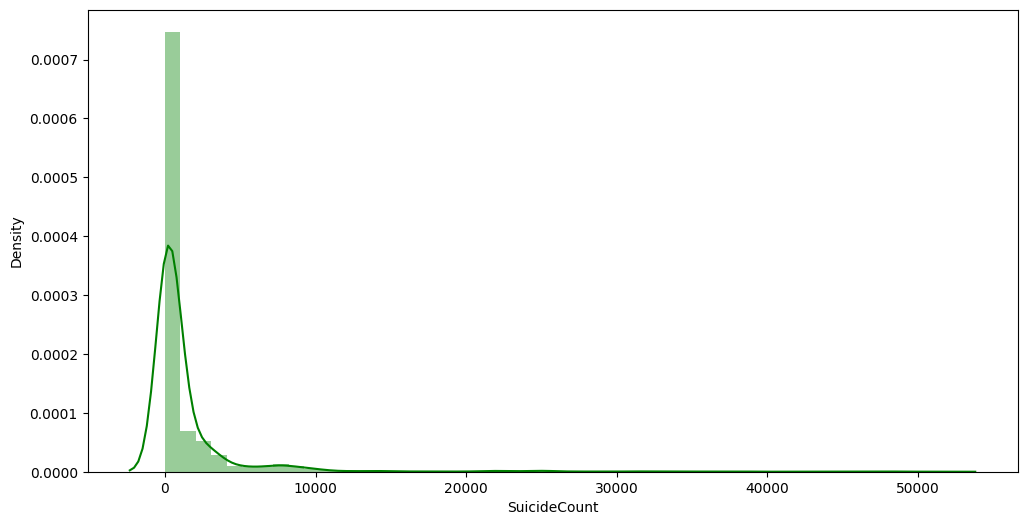

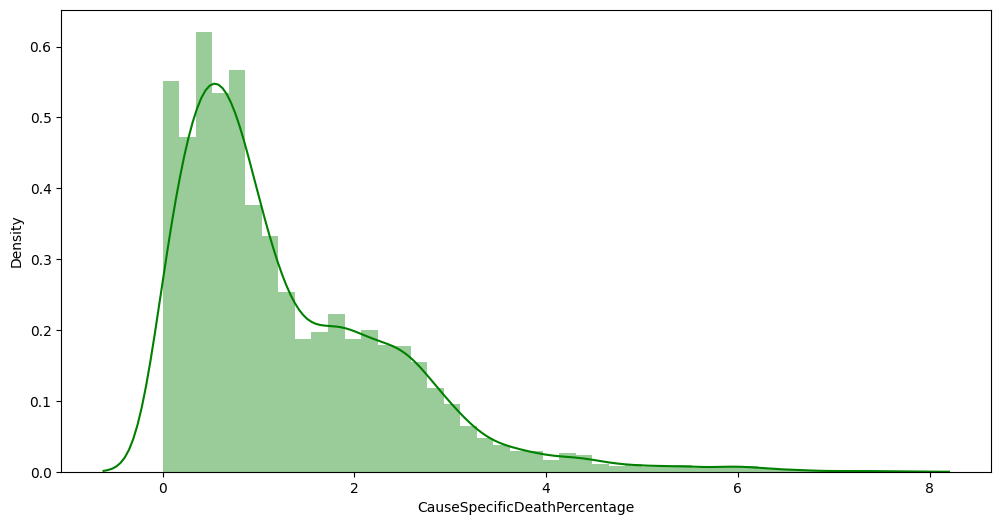

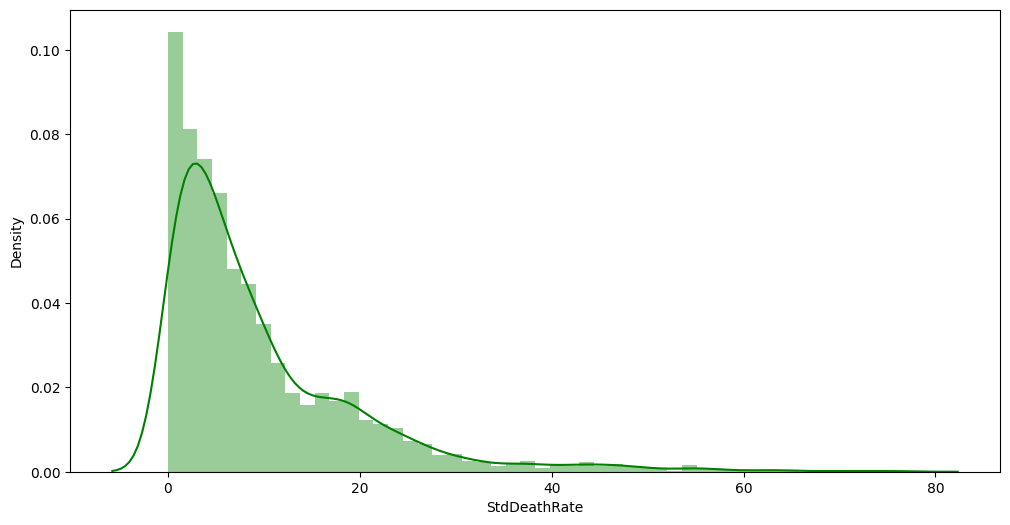

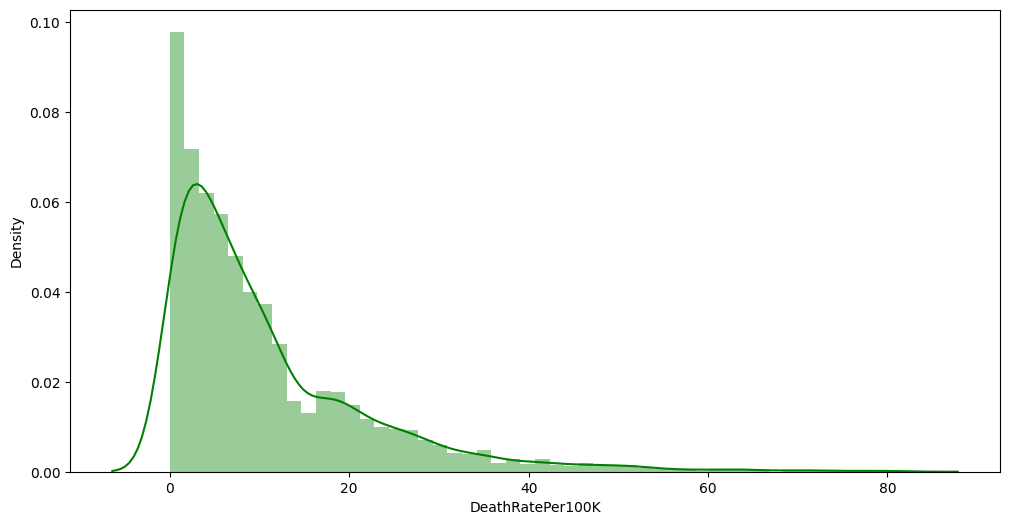

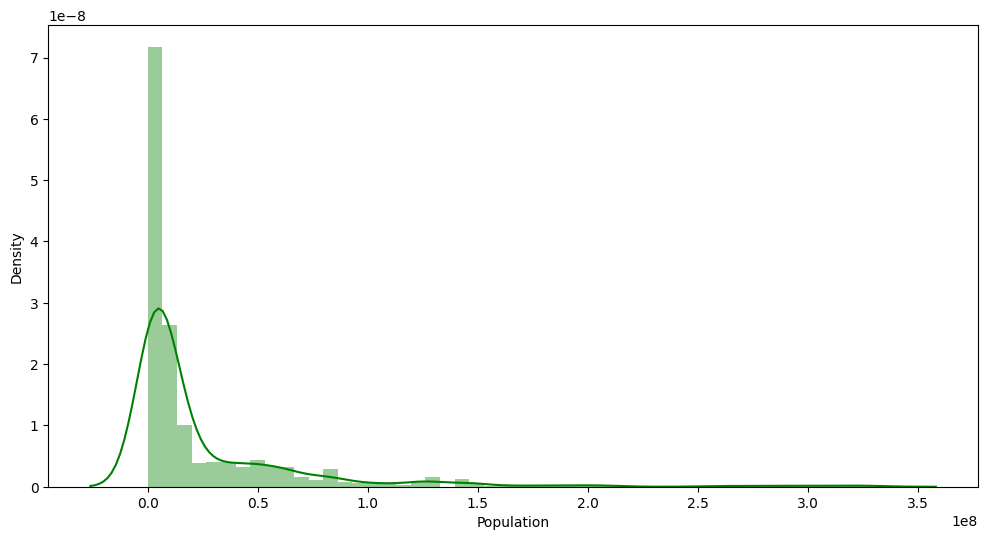

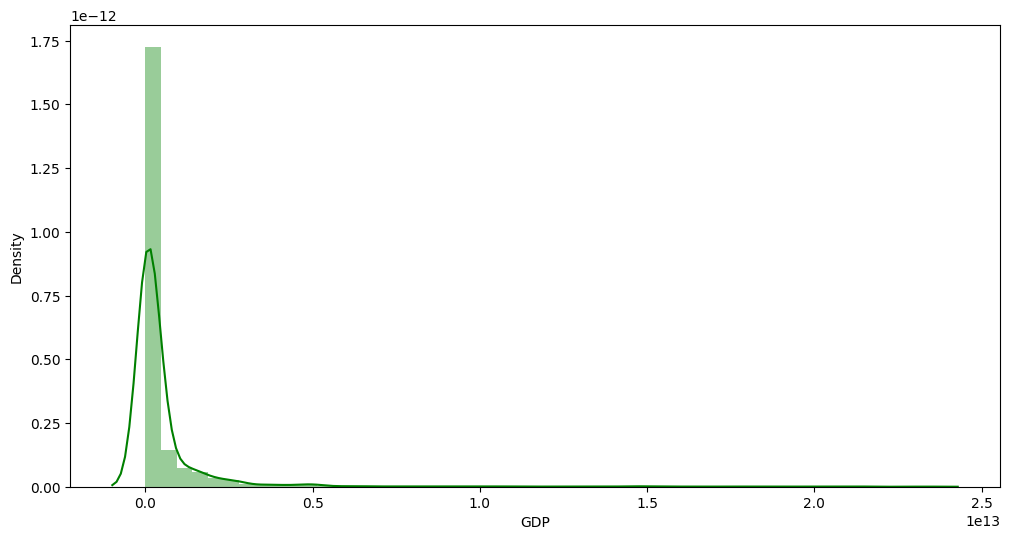

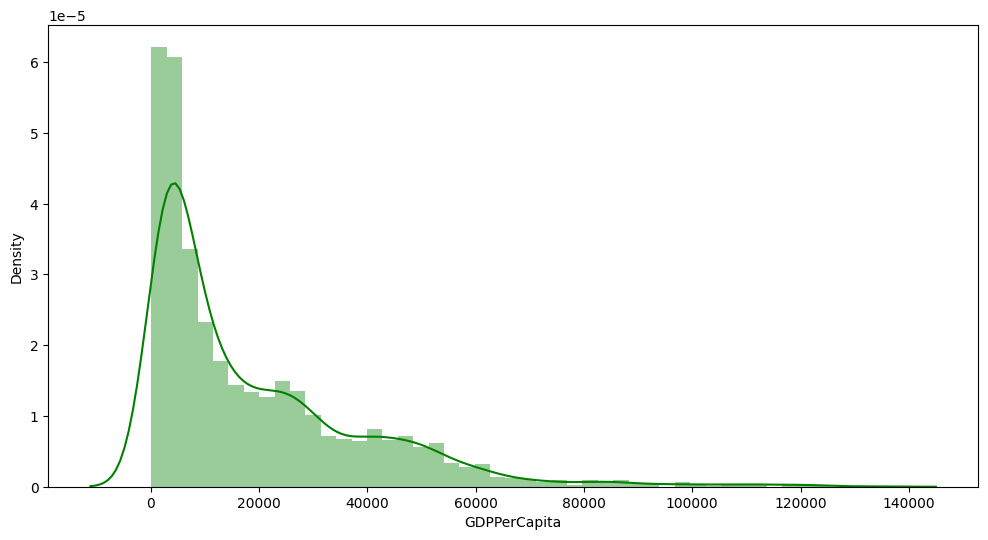

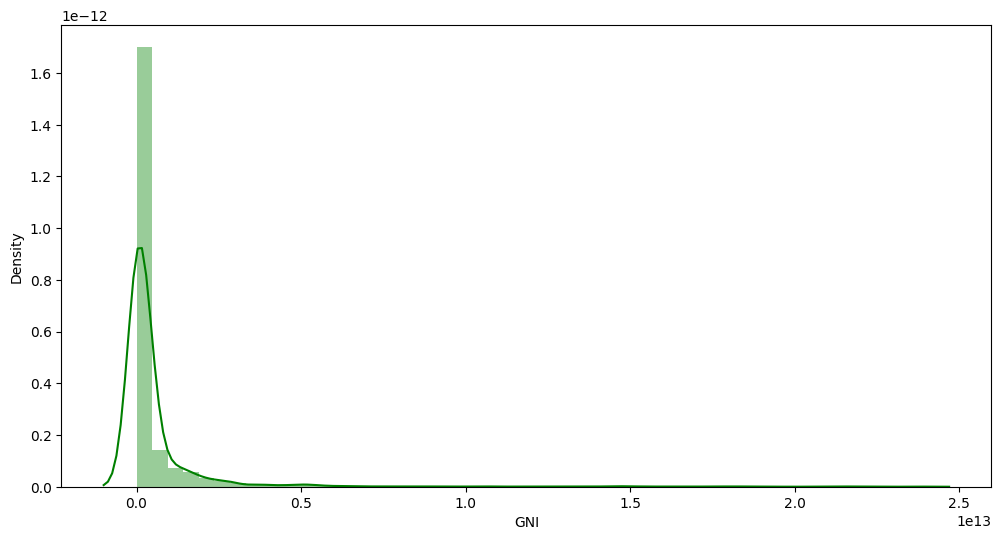

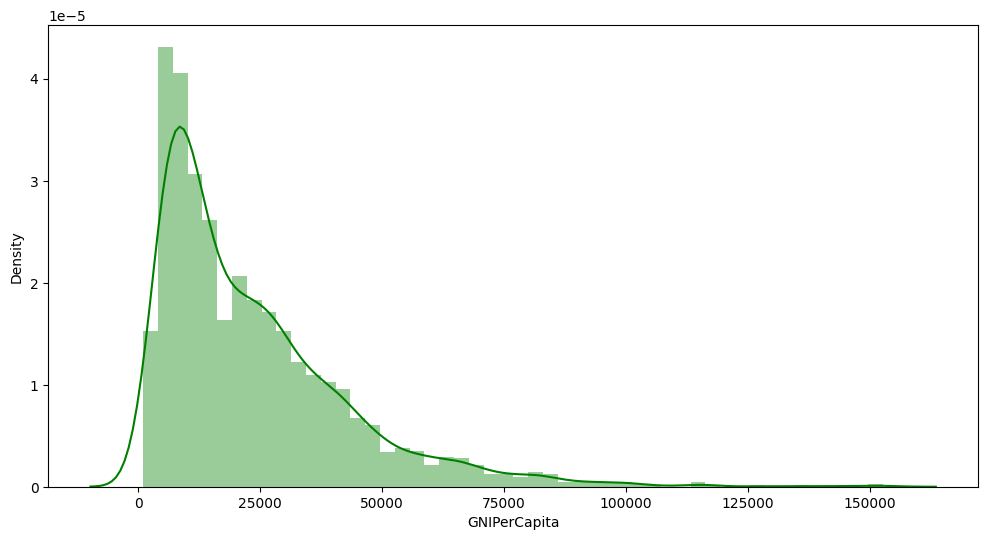

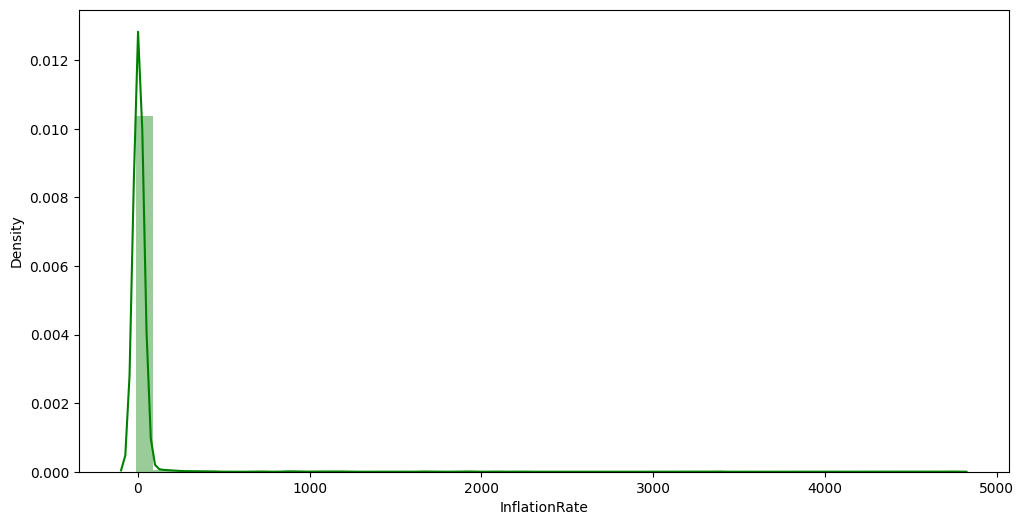

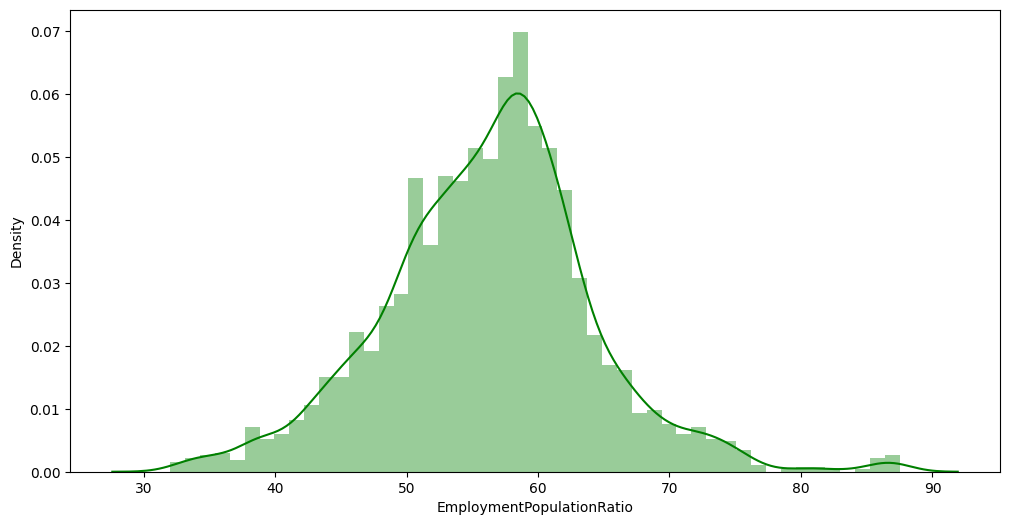

In [53]:
for i in ['SuicideCount','CauseSpecificDeathPercentage', 'StdDeathRate', 'DeathRatePer100K','Population', 'GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio']:
    plt.figure(figsize = (12,6))
    sn.distplot(data[i] , color = "green")

 **above distribution shown it has log normal distribution, it shound be to convert into normal distribution by standardization **** **

In [54]:
data_ind

,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
38,Armenia,1994,Male,76,0.558618,4.863430,4.189174,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
39,Armenia,1994,Female,36,0.325880,1.844696,1.862679,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
40,Armenia,1995,Male,95,0.714447,5.693866,5.219207,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
41,Armenia,1995,Female,35,0.303162,1.760966,1.804310,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
42,Armenia,1996,Male,63,0.477273,4.075470,3.447144,3298898.0,1.596969e+09,484.091641,1.641720e+09,1960.0,18.681186,57.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,Uzbekistan,2017,Female,801,1.097155,4.813930,4.966167,32388600.0,6.208132e+10,1916.764625,7.998291e+10,6970.0,13.875743,53.499
5209,Uzbekistan,2018,Male,1467,1.734207,9.086770,8.861782,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5210,Uzbekistan,2018,Female,811,1.153283,4.849886,4.944559,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5211,Uzbekistan,2019,Male,1446,1.716035,8.862059,8.567400,33580350.0,6.028350e+10,1795.201768,6.325433e+10,7810.0,14.525736,53.768


<Axes: xlabel='Population', ylabel='GDP'>

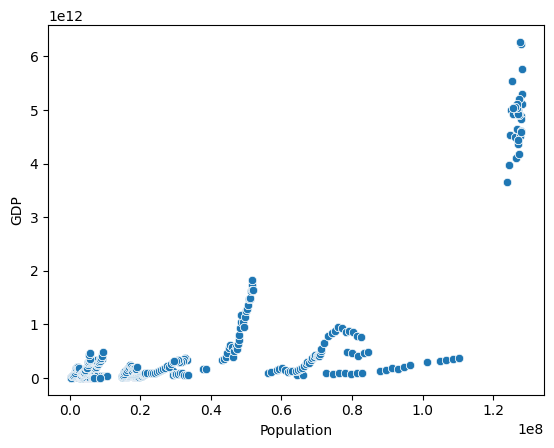

In [55]:
sn.scatterplot(x = "Population" , y = "GDP" , data = data_ind )

In [56]:
data = data_ind.drop(["CountryName" , "Sex"] , axis = 1)

In [57]:
data

,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
38,1994,76,0.558618,4.863430,4.189174,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
39,1994,36,0.325880,1.844696,1.862679,3373713.0,1.315159e+09,389.825287,1.311102e+09,1580.0,3373.759443,59.578
40,1995,95,0.714447,5.693866,5.219207,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
41,1995,35,0.303162,1.760966,1.804310,3322782.0,1.468317e+09,441.894002,1.507766e+09,1810.0,175.951325,59.147
42,1996,63,0.477273,4.075470,3.447144,3298898.0,1.596969e+09,484.091641,1.641720e+09,1960.0,18.681186,57.216
...,...,...,...,...,...,...,...,...,...,...,...,...
5208,2017,801,1.097155,4.813930,4.966167,32388600.0,6.208132e+10,1916.764625,7.998291e+10,6970.0,13.875743,53.499
5209,2018,1467,1.734207,9.086770,8.861782,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5210,2018,811,1.153283,4.849886,4.944559,32956100.0,5.287011e+10,1604.258642,6.994983e+10,7500.0,17.524180,53.648
5211,2019,1446,1.716035,8.862059,8.567400,33580350.0,6.028350e+10,1795.201768,6.325433e+10,7810.0,14.525736,53.768


In [61]:
data.skew()

Year                            -0.209761
SuicideCount                     3.840969
CauseSpecificDeathPercentage     1.582535
StdDeathRate                     2.384850
DeathRatePer100K                 2.109651
Population                       1.720418
GDP                              3.566103
GDPPerCapita                     1.387981
GNI                              3.587841
GNIPerCapita                     1.495604
InflationRate                   13.984136
EmploymentPopulationRatio       -0.122382
dtype: float64

In [62]:
data.kurtosis()

Year                             -1.022793
SuicideCount                     16.508113
CauseSpecificDeathPercentage      2.705846
StdDeathRate                      6.477448
DeathRatePer100K                  4.465105
Population                        1.936593
GDP                              11.691632
GDPPerCapita                      2.134500
GNI                              11.814373
GNIPerCapita                      2.212950
InflationRate                   216.710972
EmploymentPopulationRatio         1.615351
dtype: float64

In [63]:
data.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1.076000e+03,1.076000e+03,1076.000000,1.076000e+03,1076.000000,1076.000000,1076.000000
mean,2008.026022,1467.472119,1.304133,7.345656,7.884184,2.483421e+07,4.466866e+11,17766.204996,4.550352e+11,29650.706320,21.306684,60.468110
std,7.997166,3500.238501,1.344269,9.744221,10.170077,3.519645e+07,1.138663e+12,18310.644539,1.177940e+12,27989.164094,188.079642,9.325495
min,1991.000000,0.000000,0.000000,0.000000,0.000000,2.825070e+05,6.243371e+08,157.063550,5.790460e+08,1080.000000,-8.525170,32.026000
25%,2001.000000,17.000000,0.283120,1.081962,1.190550,3.084102e+06,1.439343e+10,3077.434419,1.392537e+10,8840.000000,0.961350,56.033000
50%,2009.000000,119.000000,0.877704,3.591591,3.709786,6.681096e+06,8.742582e+10,10848.857455,8.855290e+10,21615.000000,2.896178,60.228500
75%,2015.000000,866.000000,1.905794,9.372628,10.453547,3.184790e+07,2.670000e+11,28737.439170,2.590000e+11,41030.000000,6.471880,65.874000
max,2022.000000,23401.000000,7.585340,56.971719,52.335474,1.280700e+08,6.270000e+12,98041.362240,6.390000e+12,152630.000000,3373.759443,87.518000


In [65]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [70]:
data.corr()

,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
Year,1.000000,-0.061305,-0.119880,-0.139757,-0.114339,-0.017651,0.011276,0.241109,0.013916,0.214454,-0.156198,-0.089264
SuicideCount,-0.061305,1.000000,0.541633,0.546525,0.643434,0.721919,0.848563,0.190669,0.847128,-0.038137,-0.028764,-0.037014
CauseSpecificDeathPercentage,-0.119880,0.541633,1.000000,0.865285,0.893617,0.199150,0.282851,0.206960,0.278312,0.085338,-0.035509,0.108549
StdDeathRate,-0.139757,0.546525,0.865285,1.000000,0.985937,0.218764,0.270072,-0.027428,0.267445,-0.152806,0.009481,-0.004350
DeathRatePer100K,-0.114339,0.643434,0.893617,0.985937,1.000000,0.288640,0.371621,0.044090,0.368641,-0.107859,-0.004644,-0.005420
Population,-0.017651,0.721919,0.199150,0.218764,0.288640,1.000000,0.781627,0.009061,0.781548,-0.194275,-0.045499,-0.104230
GDP,0.011276,0.848563,0.282851,0.270072,0.371621,0.781627,1.000000,0.326806,0.997177,0.060434,-0.040621,-0.042069
GDPPerCapita,0.241109,0.190669,0.206960,-0.027428,0.044090,0.009061,0.326806,1.000000,0.321494,0.882775,-0.094453,0.431619
GNI,0.013916,0.847128,0.278312,0.267445,0.368641,0.781548,0.997177,0.321494,1.000000,0.059169,-0.040025,-0.046072
GNIPerCapita,0.214454,-0.038137,0.085338,-0.152806,-0.107859,-0.194275,0.060434,0.882775,0.059169,1.000000,-0.094260,0.497014


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [72]:
x = data.drop(["SuicideCount"] , axis = 1)
y = data["SuicideCount"]

In [74]:
model_smf = smf.ols("y~x" , data = data).fit()

In [76]:
model_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     864.2
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:48:49   Log-Likelihood:                -9118.1
No. Observations:                1076   AIC:                         1.826e+04
Df Residuals:                    1065   BIC:                         1.831e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.866e+04   9934.726      2.885      0.004    9167.330    4.82e+04
x[0]         -14.9129      4.922     -3.030      0.003     -24.570      -5.256
x[1]        -251.1176     71.209     -3.527      0.000    -390.843    -111.393
x[2]        -555.4260     30.874    -17.990      0.000    -616.006    -494.846
x[3]         705.9750     34.073     20.719      0.000     639.117     772.833
x[4]        1.406e-05   1.83e-06      7.685      0.000    1.05e-05    1.76e-05
x[5]        8.691e-10   4.26e-10      2.040      0.042    3.33e-11     1.7e-09
x[6]          -0.0287      0.005     -5.305      0.000      -0.039      -0.018
x[7]        5.496e-10   4.06e-10      1.353      0.176   -2.47e-10    1.35e-09
x[8]           0.0096      0.003      2.906      0.004       0.003       0.016
x[9]           0.0666      0.193      0.345      0.730      -0.312       0.445
x[10]         13.7372      4.643      2.959      0.003       4.627      22.847
==============================================================================
Omnibus:                      248.499   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2944.965
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                      10.981   Cond. No.                     4.91e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
r_sqr =  smf.ols("y~x" , data = data).fit().rsquared

In [78]:
r_sqr

0.8902870718113947

In [79]:
vif = 1/1-r_sqr
print(vif)

0.10971292818860534


In [83]:
x_train ,x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [94]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
x_train.shape , x_test.shape

((860, 11), (216, 11))

In [96]:
model_linear = LinearRegression()

In [97]:
model_linear.fit(x_train , y_train)

LinearRegression()

In [98]:
y_pred = model_linear.predict(x_test)

In [99]:
y_pred

array([ 1.90231095e+03,  2.66531608e+02,  7.15267103e+02,  1.59159904e+03,
        1.59811635e+03,  1.70710770e+03,  1.44281662e+03,  7.99039845e+03,
       -4.33329058e+02,  4.84480664e+01,  1.63562984e+03, -7.78406793e+02,
       -7.23528152e+02, -7.14812130e+02,  1.06332957e+04,  1.19219014e+03,
       -2.68145072e+02,  4.08889935e+02,  1.06012975e+03,  2.70428124e+02,
       -7.15485201e+01, -2.48810759e+01,  7.73802992e+02,  1.73933834e+03,
        6.06456521e+02,  1.43230247e+03,  6.61857242e+02,  1.55632071e+04,
       -4.21818094e+02,  1.54249798e+03,  3.52353504e+02, -5.18063339e+02,
       -4.76502734e+02,  1.63993763e+03, -5.28119288e+02, -4.81680960e+02,
       -9.00109937e+02, -1.56200116e+02,  1.21799805e+03,  2.14982123e+03,
        1.62290378e+04,  1.69754455e+03,  1.49201046e+03,  1.14894381e+03,
        2.76425226e+03, -2.41729751e+02, -1.44711071e+02, -2.81779819e+02,
        1.02865698e+02, -2.90152493e+02,  6.73736950e+02,  9.53523995e+02,
        3.99377851e+03, -

In [102]:
mse = np.mean((y_test - y_pred)**2)
print(mse)

1274882.1492138803


In [105]:
print("rmse linear_model",(mse)**0.5)

rmse linear_model 1129.1067926524402


In [109]:
model_tree = DecisionTreeRegressor(criterion = "friedman_mse" , max_depth = 3)

In [110]:
model_tree.fit(x_train , y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [111]:
 y_pred_tree = model_tree.predict(x_test)

In [112]:
y_pred_tree

array([ 1754.48333333,   229.91679749,   229.91679749,   229.91679749,
        1754.48333333,   229.91679749,  1754.48333333,  6940.28571429,
         229.91679749,   229.91679749,  1754.48333333,   229.91679749,
         229.91679749,   229.91679749,  7676.42307692,  1754.48333333,
         229.91679749,   229.91679749,   229.91679749,   229.91679749,
         229.91679749,   229.91679749,   229.91679749,  1754.48333333,
         229.91679749,  1754.48333333,   229.91679749, 18811.5       ,
         229.91679749,  1754.48333333,   229.91679749,   229.91679749,
         229.91679749,   229.91679749,   229.91679749,   229.91679749,
         229.91679749,   229.91679749,  1754.48333333,  1754.48333333,
       18811.5       ,  1754.48333333,  1754.48333333,   229.91679749,
        1754.48333333,   229.91679749,   229.91679749,   229.91679749,
         229.91679749,   229.91679749,   229.91679749,   229.91679749,
         229.91679749,   229.91679749,   229.91679749,   229.91679749,
      

In [113]:
mse_tree = np.mean((y_test - y_pred_tree)**2)

In [114]:
print(mse_tree)

879568.2776166694


In [115]:
print("rmse_model_tree:",(mse_tree)**0.5)


rmse_model_tree: 937.8530149318012


In [117]:
model_forest = RandomForestRegressor(n_estimators = 100 , max_features = 5)

In [118]:
model_forest.fit(x_train , y_train)

RandomForestRegressor(max_features=5)

In [120]:
y_pred_forest = model_forest.predict(x_test)

In [121]:
y_pred_forest

array([1.510570e+03, 4.943900e+02, 9.333700e+02, 4.113800e+02,
       5.289000e+02, 3.312100e+02, 1.217240e+03, 8.300150e+03,
       2.030000e+00, 1.084000e+02, 8.817700e+02, 0.000000e+00,
       4.810000e+00, 2.890000e+00, 8.541820e+03, 1.186510e+03,
       8.742000e+01, 1.333000e+01, 1.941500e+02, 1.144400e+02,
       5.031000e+01, 4.043000e+01, 1.933100e+02, 1.136730e+03,
       2.726000e+01, 1.130950e+03, 1.270400e+03, 2.138815e+04,
       1.393000e+01, 4.658800e+02, 4.908500e+02, 2.400000e+00,
       1.286000e+01, 3.429200e+02, 5.820000e+00, 1.010300e+02,
       1.577600e+02, 0.000000e+00, 8.606900e+02, 2.035700e+03,
       2.154929e+04, 9.988400e+02, 1.248030e+03, 2.122400e+02,
       3.709690e+03, 1.162000e+01, 1.300000e-01, 1.580000e+01,
       3.830000e+01, 4.828000e+02, 1.555700e+02, 3.797500e+02,
       6.172700e+02, 5.330000e+00, 3.174180e+03, 8.000000e+00,
       1.075600e+02, 5.342900e+02, 1.887220e+03, 5.339000e+01,
       6.106700e+02, 2.085840e+04, 9.495430e+03, 3.5476

In [122]:
mse_forest = np.mean((y_test - y_pred_forest)**2)
print(mse_forest)

34459.52234212965


In [124]:
print("rmse_model_random:",((mse_forest)**0.5))

rmse_model_random: 185.63276203873508


In [150]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras import initializers
from keras import losses

In [151]:
models = Sequential()
models.add(Dense(11 , input_dim = 11 , activation = "relu" , kernel_initializer = initializers.RandomUniform() )) ## input layer
models.add(Dense(24 , activation = "relu")) ## 1st hidden layer
models.add(Dense(36 , activation = "relu"))## 2nd hidden layer
models.add(Dense(18 , activation = "relu")) ## 3rd hidden layer
models.add(Dense(1, activation = "linear")) ## output layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
models.compile(loss = losses.MeanSquaredError()  , optimizer = "Adam" , metrics = ["accuracy"])

In [153]:
history = models.fit(x_train , y_train ,validation_split = 0.30 , batch_size = 35 , epochs = 50)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0464 - loss: 13536396.0000 - val_accuracy: 0.0388 - val_loss: 18466862.0000
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0324 - loss: 11618917.0000 - val_accuracy: 0.0233 - val_loss: 18460276.0000
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0283 - loss: 13581017.0000 - val_accuracy: 0.0233 - val_loss: 18443390.0000
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0268 - loss: 12288197.0000 - val_accuracy: 0.0233 - val_loss: 18398528.0000
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0273 - loss: 11098904.0000 - val_accuracy: 0.0233 - val_loss: 18283622.0000
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0274 - loss: 12789746.0000 - val_accuracy: 0.0233 - val_loss: 18013794.0000
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0259 - loss: 15784316.0000 - val_accuracy: 0.0233 - val_loss: 17451524.0000
Epoch 8/50
18/18 ━━